In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [4]:
df = pd.read_csv('/content/Classified Data.csv',index_col=0)

In [5]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [6]:
from sklearn.preprocessing import MinMaxScaler

In [7]:
scaler = MinMaxScaler()

In [18]:
df.columns

Index(['WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF', 'HQE', 'NXJ',
       'TARGET CLASS'],
      dtype='object')

In [10]:
scaled_df = scaler.fit_transform(df.drop('TARGET CLASS', axis = 1))

In [11]:
scaled_df

array([[0.4779121 , 0.51759273, 0.25584607, ..., 0.23171931, 0.33821385,
        0.47176676],
       [0.29806768, 0.40386405, 0.23483597, ..., 0.48054997, 0.16862214,
        0.68009105],
       [0.3534701 , 0.54590434, 0.48399637, ..., 0.57539686, 0.38981083,
        0.51496952],
       ...,
       [0.62109238, 0.3885955 , 0.39372412, ..., 0.06064075, 0.36436871,
        0.59462402],
       [0.58840762, 0.30191296, 0.15223219, ..., 0.51271266, 0.59998625,
        0.43720711],
       [0.42850058, 0.37331294, 0.15857854, ..., 0.40949472, 0.58665816,
        0.57814674]])

In [13]:
df_scaled = pd.DataFrame(scaled_df,columns=df.columns[:-1])
df_scaled

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,0.477912,0.517593,0.255846,0.446856,0.348797,0.064235,0.327526,0.231719,0.338214,0.471767
1,0.298068,0.403864,0.234836,0.490999,0.456119,0.274872,0.268036,0.480550,0.168622,0.680091
2,0.353470,0.545904,0.483996,0.509837,0.907533,0.326371,0.938657,0.575397,0.389811,0.514970
3,0.684900,0.678940,0.310686,0.490986,0.619742,0.436264,0.785889,0.727165,0.761269,0.409326
4,0.714167,0.365101,0.294082,0.392456,0.687196,0.314229,0.578492,0.233666,0.722546,0.621463
...,...,...,...,...,...,...,...,...,...,...
995,0.540622,0.425615,0.439613,0.363198,0.540406,0.230579,0.318439,0.013646,0.494684,0.565135
996,0.259226,0.369436,0.496785,0.470391,0.823357,0.717082,0.536417,0.278421,0.390341,0.816257
997,0.621092,0.388595,0.393724,0.548295,0.438829,0.443107,0.064574,0.060641,0.364369,0.594624
998,0.588408,0.301913,0.152232,0.390393,0.968955,0.485200,0.395298,0.512713,0.599986,0.437207


In [14]:
df['TARGET CLASS']

,TARGET CLASS
0,1
1,0
2,0
3,1
4,1
...,...
995,1
996,0
997,1
998,1


In [16]:
from sklearn.model_selection import train_test_split


In [17]:
X_train, X_test, y_train, y_test= train_test_split(df_scaled, df['TARGET CLASS'], test_size=0.2)

In [19]:
X_train.shape, X_test.shape

((800, 10), (200, 10))

In [20]:
#Lets build our KNN model

In [21]:
from sklearn.neighbors import KNeighborsClassifier as KNN

In [22]:
model = KNN(n_neighbors=2)

In [23]:
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [25]:
predictions = model.predict(X_test)
predictions

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1])

In [26]:
from sklearn.metrics import classification_report, confusion_matrix

In [27]:
confusion_matrix(y_test, predictions)

array([[98,  5],
       [14, 83]])

In [28]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91       103
           1       0.94      0.86      0.90        97

    accuracy                           0.91       200
   macro avg       0.91      0.90      0.90       200
weighted avg       0.91      0.91      0.90       200



In [29]:
#To find out how many neighbors to use

In [30]:
from sklearn.neighbors import KNeighborsClassifier

In [32]:
counter = []
for i in range(1,20):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)
  pred_i = knn.predict(X_test)
  counter.append(np.mean(pred_i != y_test))


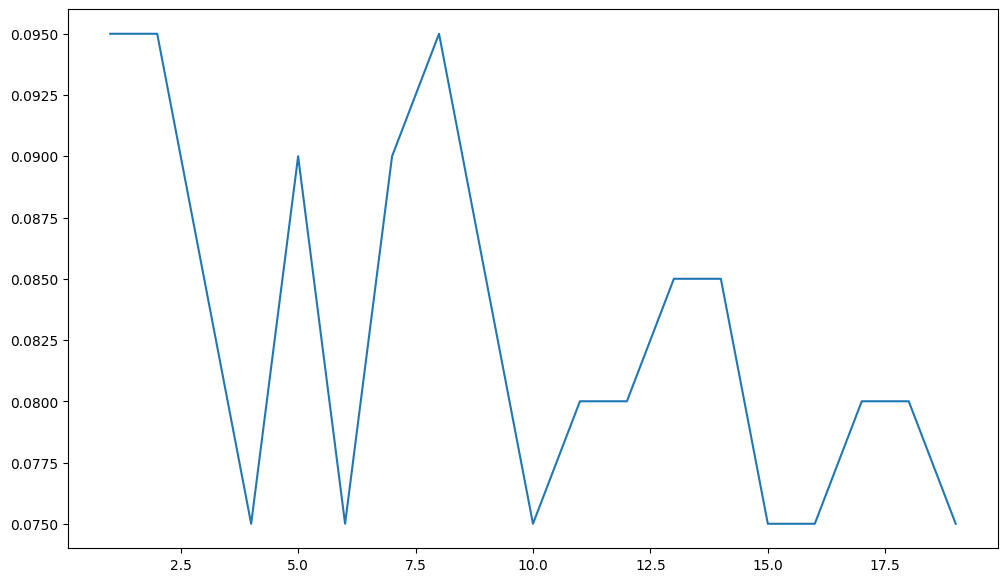

In [33]:
plt.figure(figsize=(12,7))
plt.plot(range(1,20), counter)